In [99]:
import yfinance as yf

In [100]:
sp500 = yf.Ticker("^GSPC")

In [101]:
sp500 = sp500.history(period="max")

In [102]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-09-05 00:00:00-04:00', '2025-09-08 00:00:00-04:00',
               '2025-09-09 00:00:00-04:00', '2025-09-10 00:00:00-04:00',
               '2025-09-11 00:00:00-04:00', '2025-09-12 00:00:00-04:00',
               '2025-09-15 00:00:00-04:00', '2025-09-16 00:00:00-04:00',
               '2025-09-17 00:00:00-04:00', '2025-09-18 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24545, freq=None)

In [103]:
#cleaning our visualizing our stock market data

<Axes: xlabel='Date'>

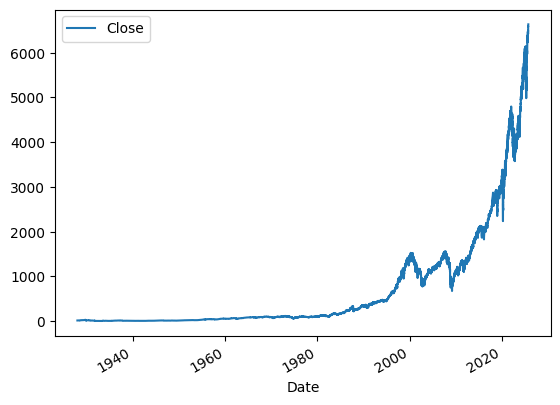

In [104]:
sp500.plot.line(y="Close", use_index=True)
#chart of the sp500 index fund price history

In [105]:
#data cleaning by removing extra columns we dont need
del sp500["Dividends"] #removes dividends column
del sp500["Stock Splits"] #removes stocks split columns

In [106]:
#setting up our target for machine learning

#will the price go up or down?
#on days the stock goes up, can we predict if it goes up... so when we buy it we can be confident it goes up.

sp500["Tomorrow"] = sp500["Close"].shift(-1)
#create column that represents tomorrows price.

In [107]:
#target is what we will try and predict
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) #passing this as an integer

In [108]:
sp500

# the target column presents us a 1 if the price went up and a 0 if the price went down

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-09-12 00:00:00-04:00,6590.660156,6600.209961,6579.490234,6584.290039,4641640000,6615.279785,1
2025-09-15 00:00:00-04:00,6603.490234,6619.620117,6602.069824,6615.279785,5045020000,6606.759766,0
2025-09-16 00:00:00-04:00,6624.129883,6626.990234,6600.109863,6606.759766,5359510000,6600.350098,0


In [109]:
#setting up our target for machine learning

#will the price go up or down?
#on days the stock goes up, can we predict if it goes up... so when we buy it we can be confident it goes up.

sp500["Tomorrow"] = sp500["Close"].shift(-1)
#create column that represents tomorrows price.

#target is what we will try and predict
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) #passing this as an integer

sp500 = sp500.loc["1990-01-01":].copy() #the copy helps prevent a copy warning in our output

#the loc method in pandas, which only gives us rows after the date/column we inputted.

In [110]:
#start training our model

In [111]:
#random forest classifiers is a model that works by training individ decision trees with random parametrs, and avgs the result of those trees.

In [112]:
from sklearn.ensemble import RandomForestClassifier
 #most relationships in stock prices are nonlinear

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
# n_estimators is the number of decision trees we want to train. the higher amount the better accuracy
# min_samples_split help against over fitting, decision trees are known for overfitting complications with a tree that is deep
# random_state, a random forest will have random numbers within a sequence giving us similar results rather than fully random numbers

train = sp500.iloc[:-100]
# splitting our data into a train and date set
# we want our model to learn how to predict the stock price. so we remove the knowledge of the last 100 rows in the training set
# but we include the last 100 rows in the test set.

test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) #using the predict columns to predict the target


RandomForestClassifier(min_samples_split=100, random_state=1)



RandomForestClassifier(min_samples_split=100, random_state=1)

In [113]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [114]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [115]:
precision_score(test["Target"], preds)

0.6153846153846154

<Axes: xlabel='Date'>

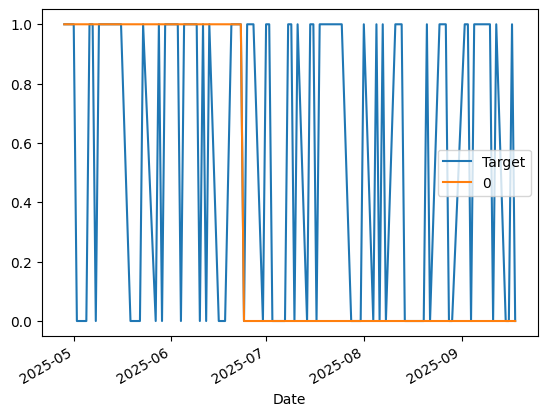

In [116]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

# the orange line is our predictions, and the blue line is what ended up happening


## Now its time to build a backtesting system.

In [117]:
#to backtest we need to build a 'predict' function that essentially wrap up everything we did into one function,

def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined



In [118]:
#backtest function... which takes in our model, our predictors, and our data...
# the start value is the amount of data we start with to train... so it takes 10 yrs of data to train our data

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [119]:
predictions = backtest(sp500, model, predictors)

predictions["Predictions"].value_counts()

,count
Predictions,
0,3829
1,2666


In [120]:
predictions["Predictions"].value_counts()
#value counts show how many type of prediction was made (0 would be going down, 1 would be going up)

,count
Predictions,
0,3829
1,2666


In [121]:
# we can look at our precision score to see the target vs prediction comparison, that shows us our precision score
precision_score(predictions["Target"], predictions["Predictions"])

0.5296324081020255

In [122]:
# benchmark to see how good the predictions are

predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.536721
0,0.463279


## Adding additional predictors to our model

In [127]:
horizons = [2, 5, 60, 250, 1000]

#2 days is a short term trend, 5 days is one trading week, 60 is three months, 250 is one year, and 1000 days is four trading years.

new_predictors = []
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]

In [128]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-12 00:00:00-04:00,6590.660156,6600.209961,6579.490234,6584.290039,4641640000,6615.279785,1,0.999759,1.0,1.006416,4.0,1.038676,34.0,1.106867,142.0,1.359736,530.0
2025-09-15 00:00:00-04:00,6603.490234,6619.620117,6602.069824,6615.279785,5045020000,6606.759766,0,1.002348,1.0,1.007453,4.0,1.041827,35.0,1.111338,142.0,1.365499,531.0
2025-09-16 00:00:00-04:00,6624.129883,6626.990234,6600.109863,6606.759766,5359510000,6600.350098,0,0.999356,1.0,1.003279,3.0,1.038743,35.0,1.109181,141.0,1.363106,531.0


In [129]:
sp500.dropna()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-11 00:00:00-04:00,6554.410156,6592.890137,6545.799805,6587.470215,5426460000,6584.290039,0,1.004225,2.0,1.010076,4.0,1.040824,34.0,1.108138,143.0,1.360997,530.0
2025-09-12 00:00:00-04:00,6590.660156,6600.209961,6579.490234,6584.290039,4641640000,6615.279785,1,0.999759,1.0,1.006416,4.0,1.038676,34.0,1.106867,142.0,1.359736,530.0
2025-09-15 00:00:00-04:00,6603.490234,6619.620117,6602.069824,6615.279785,5045020000,6606.759766,0,1.002348,1.0,1.007453,4.0,1.041827,35.0,1.111338,142.0,1.365499,531.0


## Improving the model

In [130]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [131]:
# change the predict function from earlier
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]  # predict_proba method will return a probability wether the row will go up or down the next day
                                                      # the [:,1] helps us stick to the probability of it going up only
  preds[preds >= 0.6] = 1
  preds[preds < 0.6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined


In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [134]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,3829
1,2666


In [135]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5296324081020255

## Summary


-Downloaded stock data from the sp500 index, and visualized it


-Set up our machine learning model and evaluated error and backtested the data.

-Improved our model with extra predictors.


When looking at room for future improvments, but we can consider indeces that open outside of the US market hours. We can also look at data by the hour, minute, etc. for more accurate predictions.